# Preprocessing Workflow
This notebook describes data cleaning and further preparations

In [56]:
import pandas as pd

#loading the training and test dataset
train = pd.read_csv('../raw_data/train.csv')
test = pd.read_csv('../raw_data/test.csv')


### Dropping null values

In [8]:
duplicate_count = len(data) - len(data.drop_duplicates())
duplicate_count

0

In [33]:
null_percentages = round(data.isnull().sum().sort_values(ascending=False)/len(data),2)
pd.set_option('display.max_rows', None)
print(null_percentages)
      

rez_esc            0.83
v18q1              0.77
v2a1               0.72
SQBmeaned          0.00
meaneduc           0.00
Id                 0.00
hogar_adul         0.00
parentesco10       0.00
parentesco11       0.00
parentesco12       0.00
idhogar            0.00
hogar_nin          0.00
dependency         0.00
hogar_mayor        0.00
hogar_total        0.00
edjefe             0.00
edjefa             0.00
instlevel1         0.00
instlevel2         0.00
parentesco9        0.00
parentesco7        0.00
parentesco8        0.00
estadocivil6       0.00
female             0.00
estadocivil1       0.00
estadocivil2       0.00
estadocivil3       0.00
estadocivil4       0.00
estadocivil5       0.00
estadocivil7       0.00
instlevel4         0.00
parentesco1        0.00
parentesco2        0.00
parentesco3        0.00
parentesco4        0.00
parentesco5        0.00
parentesco6        0.00
instlevel3         0.00
instlevel6         0.00
instlevel5         0.00
SQBescolari        0.00
lugar4          

In [36]:
columns_to_drop = []

for column in data.columns:
    if data[column].isnull().sum()/(len(data[column])) > 0.7:
        columns_to_drop.append(column)
        
data = data.drop(columns_to_drop, axis=1)

data = data.

### Encoding

In [43]:
X = data.drop(columns=['Target'])
y = data['Target']

In [44]:
X.dtypes.value_counts()

int64      129
object       5
float64      5
Name: count, dtype: int64

In [50]:
feat_categorical_nunique = X.select_dtypes(include = 'object')

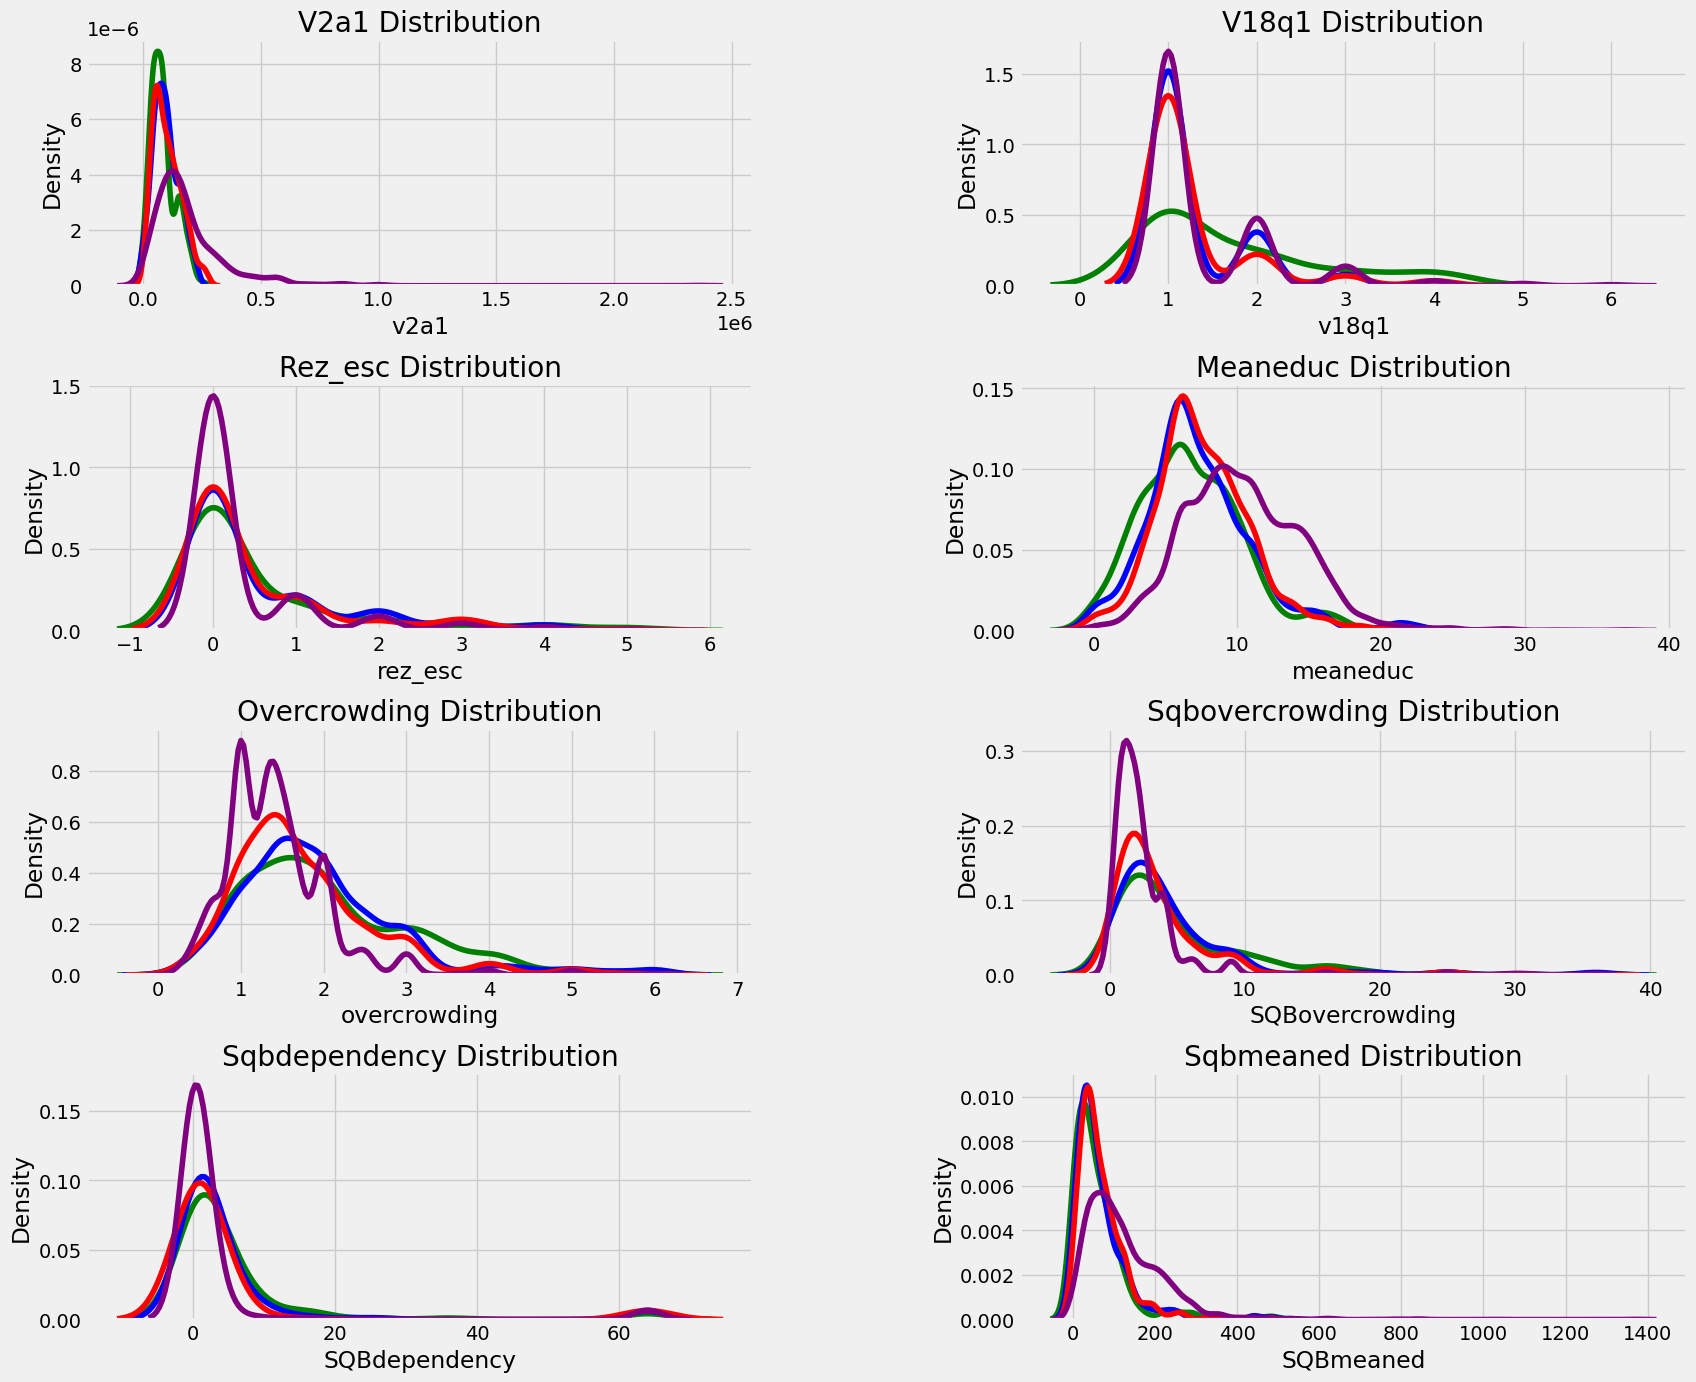

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# We build float columns

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1 : 'green', 2 : 'blue', 3: 'red', 4: 'purple'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})


for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot (4,2,i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
    
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

In [77]:
train.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [ ]:
mapping = {'yes' : 1, 'no' : 0  }

for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping.astype('float'))
    df['edjefe'] = df['edjefe'].replace(mapping.astype('float'))
    df['edjefa'] = df['edjefa'].replace(mapping.astype('float'))